# Ave

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os

import heatmap_car_following

plt.rcParams['font.size'] = 20
plt.rcParams['font.family'] = 'Arial'
# plt.rcParams['font.family'] = 'Meiryo'

lane_label = "three"

In [2]:
# print
list_of_files = glob.glob(f'../out/heatmap/csv/{lane_label}_lane/*space_mean_speed.csv')
for ind, file in enumerate(list_of_files):
    print(file)
    df = pd.read_csv(file, index_col=0)
    if ind == 0:
        sum_count = df.values
    else:
        count = df.values
        sum_count += count

../out/heatmap/csv/three_lane/heatmap_0122-1924_loop03_row7_column5_space_mean_speed.csv
../out/heatmap/csv/three_lane/heatmap_0122-1925_loop04_row7_column5_space_mean_speed.csv
../out/heatmap/csv/three_lane/heatmap_0122-1929_loop09_row7_column5_space_mean_speed.csv
../out/heatmap/csv/three_lane/heatmap_0122-1923_loop02_row7_column5_space_mean_speed.csv
../out/heatmap/csv/three_lane/heatmap_0122-1926_loop05_row7_column5_space_mean_speed.csv
../out/heatmap/csv/three_lane/heatmap_0122-1921_loop00_row7_column5_space_mean_speed.csv
../out/heatmap/csv/three_lane/heatmap_0122-1928_loop08_row7_column5_space_mean_speed.csv
../out/heatmap/csv/three_lane/heatmap_0122-1922_loop01_row7_column5_space_mean_speed.csv
../out/heatmap/csv/three_lane/heatmap_0122-1927_loop06_row7_column5_space_mean_speed.csv
../out/heatmap/csv/three_lane/heatmap_0122-1927_loop07_row7_column5_space_mean_speed.csv


In [8]:
sum_df = pd.DataFrame(sum_count, index=[3,4,5,6,7,8,9], columns=[4.0,6.0,8.0,10.0,12.0])
sum_df /= 10

sum_df 

,4.0,6.0,8.0,10.0,12.0
3,0.136807,0.282779,0.261343,0.319162,0.446084
4,0.045046,0.185646,0.277443,0.729655,0.915341
5,0.152499,0.243319,0.411077,0.772085,1.002781
6,0.144997,0.249277,0.259673,0.439715,0.841082
7,0.128137,0.249041,0.407055,0.674617,0.965766
8,0.155545,0.231723,0.378824,0.548332,1.161373
9,0.156244,0.219198,0.410982,0.596274,1.365622


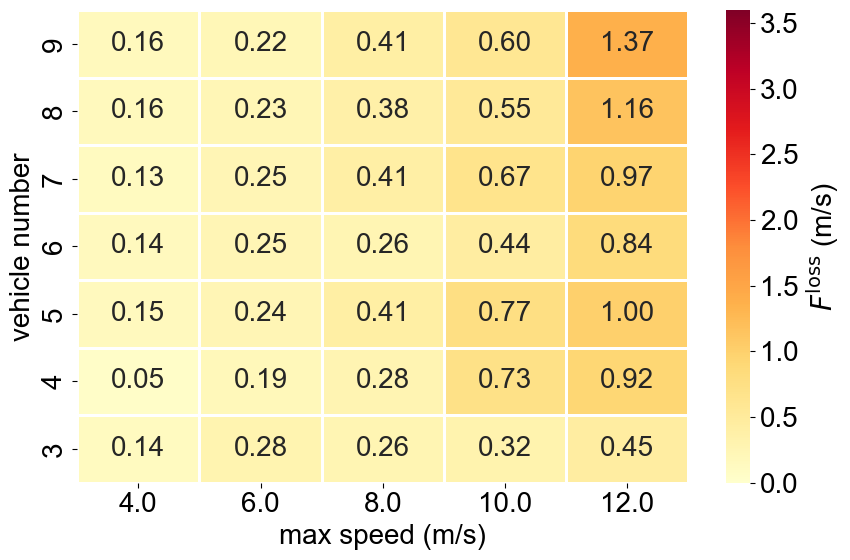

In [9]:
x_label = heatmap_car_following.x_param_label
y_label = heatmap_car_following.y_param_label
plt.figure(figsize=(9,6))
ax = sns.heatmap(sum_df, cmap='YlOrRd', linewidths=2, vmin=0, vmax=3.6, annot=True, fmt=".2f") 
ax.collections[0].colorbar.set_label(r"$F^{\mathrm{loss}}$ (m/s)")
ax.invert_yaxis()
plt.xlabel(x_label)
plt.ylabel(y_label)
# plt.xlabel("最大速度 (m/s)")
# plt.ylabel("車両台数")
plt.tight_layout()
plt.savefig(f'../out/heatmap/img/flock_{lane_label}_lane.png', dpi=150)
plt.show()